In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from karin import plot_karin

In [3]:
# version = 'v0_2_0'
#version = 'v0_3_0'
version = 'v1_0_0'


region = 'browsebasin'
area = [120, -16, 125, -11] # Kimberley
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v0_3/*_021*.nc'))
ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_[4-5]*/*_021*.nc'))

# region = 'pilbara'
# area = [112, -21.5, 116.5, -15] # Pilbara
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir/*_008*.nc'))

# region = 'brunei'
# area = [109, 3, 113, 9] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir/*_008*.nc'))

# region = 'southchinasea'
# area = [108, 9, 113, 18] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir/*_008*.nc'))

# region = 'indoseas_pass021'
# area = [108, -11, 135, 9] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v0_3/*_021*.nc'))

# region = 'ningaloo_pass062'
# area = [113, -23, 115, -20.5] # Ningaloo
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_062*.nc'))

# region = 'ningaloo_pass131'
# area = [113, -23, 115, -20.5] # Ningaloo
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_131*.nc'))

In [6]:
ds = xr.open_dataset(ncfiles[0])
ds

<xarray.Dataset>
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 1342)
Coordinates:
    latitude              (num_lines, num_pixels) float64 ...
    longitude             (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines) datetime64[ns] ...
    mdt                   (num_lines, num_pixels) float64 ...
    ssha                  (num_lines, num_pixels) float64 ...
    ssha_noiseless        (num_lines, num_pixels) float64 ...
    ssha_unedited         (num_lines, num_pixels) float64 ...
    quality_flag          (num_lines, num_pixels) uint8 ...
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 ...
    vgosa                 (num_lines, num_pixels) float64 ...
    sigma0                (num_lines, num_pixels) float64 ...
    cross_track_distance  (num_pixels) float64 ...
    i_num_line            (num_nadir) int16 ...
    i_num_pixel           (num_nadir) int8 ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              41.756995
    geospatial_lon_max:              208.702964
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [7]:
# Merge all dataset

from datetime import datetime
def add_time_dim(xda):
    #xda = xda.expand_dims(satpass = [datetime.now()])
    xda = xda.expand_dims(satpass = [xda.time.mean().values])
    return xda

drop_vars=['i_num_line','i_num_pixel']
dsall = xr.open_mfdataset(ncfiles, preprocess=add_time_dim, 
                          drop_variables=drop_vars,
                         )
dsall

<xarray.Dataset>
Dimensions:               (satpass: 99, num_lines: 9860, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 2023-03-29T15:29:32.599375...
    latitude              (num_lines, num_pixels) float64 dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude             (num_lines, num_pixels) float64 dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/16)
    time                  (satpass, num_lines) datetime64[ns] dask.array<chunksize=(1, 9860), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ssha                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ssha_noiseless        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ssha_unedited         (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    quality_flag          (satpass, num_lines, num_pixels) uint8 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ...                    ...
    ugos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ugosa                 (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgosa                 (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    sigma0                (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels) float64 dask.array<chunksize=(1, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              41.756995
    geospatial_lon_max:              208.702964
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [8]:
# Subsample
ds = dsall

selection = (
    (ds.longitude > area[0]) &
    (ds.longitude < area[2]) &
    (ds.latitude > area[1]) &
    (ds.latitude < area[3]))
selection = selection.compute()
ds_area = ds.where(selection, drop=True)
ds_area

<xarray.Dataset>
Dimensions:               (satpass: 99, num_lines: 290, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 2023-03-29T15:29:32.599375...
    latitude              (num_lines, num_pixels) float64 -15.99 ... -11.01
    longitude             (num_lines, num_pixels) float64 122.2 122.3 ... 124.3
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/16)
    time                  (satpass, num_lines, num_pixels) datetime64[ns] dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    ssha                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    ssha_noiseless        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    ssha_unedited         (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    quality_flag          (satpass, num_lines, num_pixels) float32 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    ...                    ...
    ugos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    vgos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    ugosa                 (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    vgosa                 (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    sigma0                (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 290, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels, num_lines) float64 dask.array<chunksize=(1, 69, 290), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              41.756995
    geospatial_lon_max:              208.702964
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [9]:
%%time
ds_area.to_netcdf('/home/jupyter-mrayson/data/SWOT/Karin_l3_{}_complete_calval_{}.nc'.format(version, region))


/home/jupyter-mrayson/.local/lib/python3.10/site-packages/xarray/coding/times.py:618: RuntimeWarning: invalid value encountered in cast
  int_num = np.asarray(num, dtype=np.int64)


CPU times: user 19.9 s, sys: 1.79 s, total: 21.7 s
Wall time: 43.2 s


(<Figure size 600x400 with 4 Axes>,
 <Axes: title={'center': '2023-04-09T13:46:28.794696162'}, xlabel='longitude (degrees East)\n[degrees_east]', ylabel='latitude (positive N, negative\nS) [degrees_north]'>,
 <Axes: xlabel='longitude (degrees East)\n[degrees_east]'>)

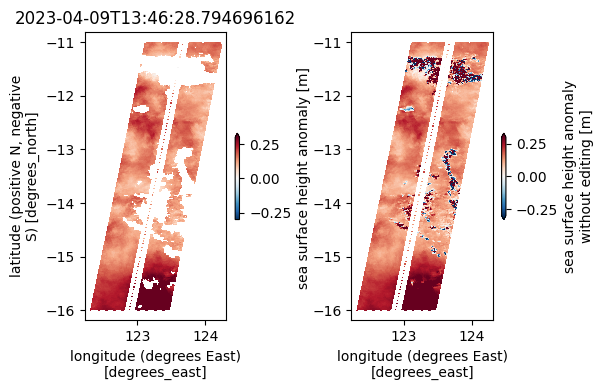

In [10]:
plot_karin(ds_area,9, var1='ssha',var2='ssha_unedited')

../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2023-08-13.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2023-09-03.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2023-10-14.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2023-11-04.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2023-11-25.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2023-12-16.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2024-01-06.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2024-01-27.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2024-02-17.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2024-03-08.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2024-03-29.png
../FIGURES/SWOT/SWOT_Karin_l3_ningaloo_pass062_2024-04-19.png


IndexError: index 12 is out of bounds for axis 0 with size 12

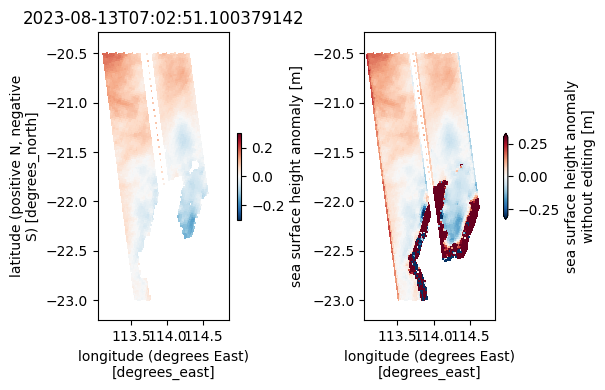

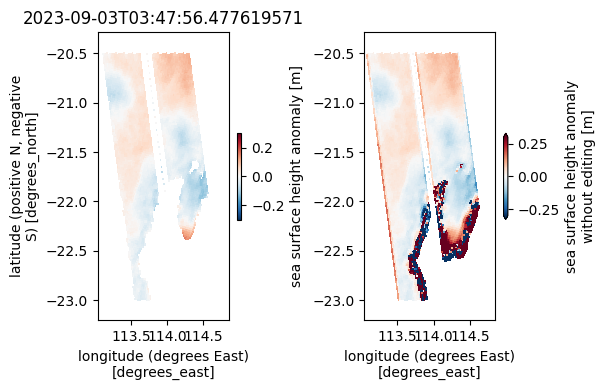

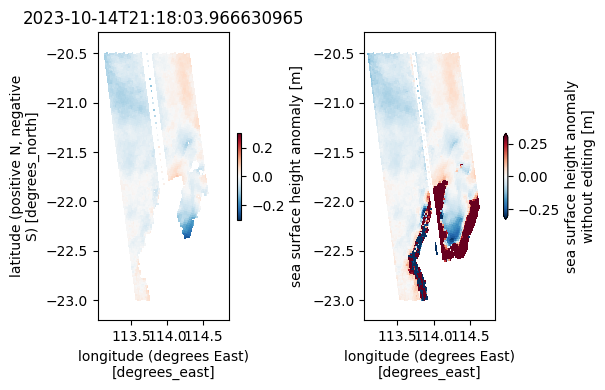

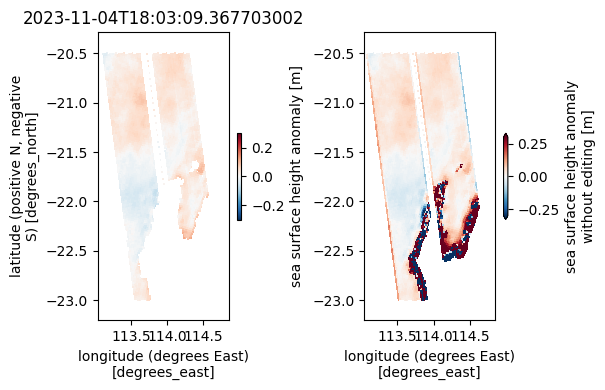

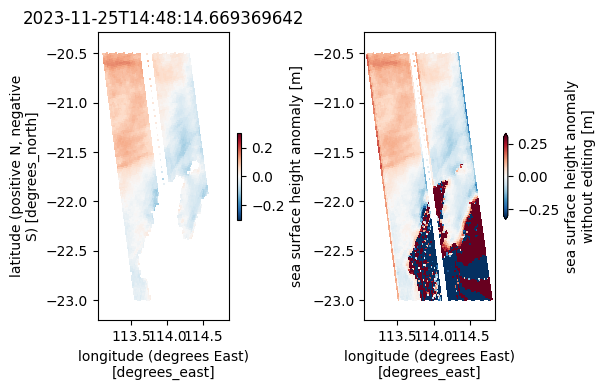

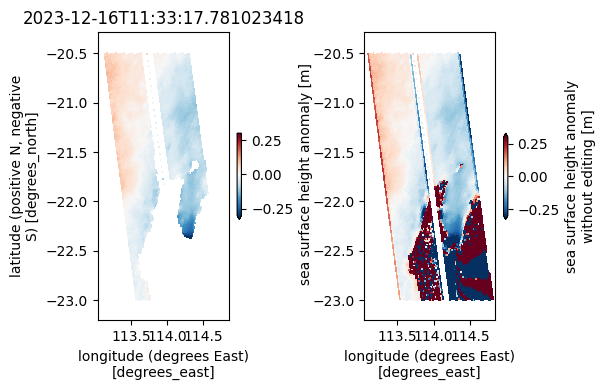

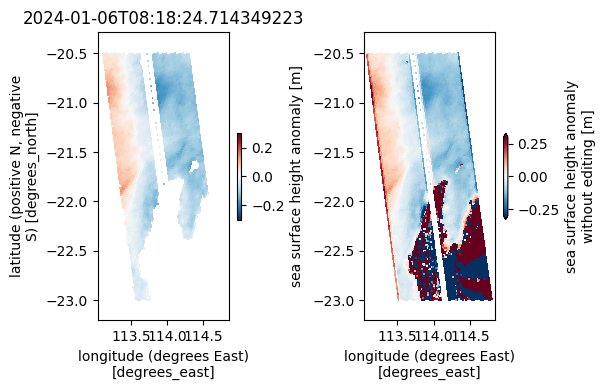

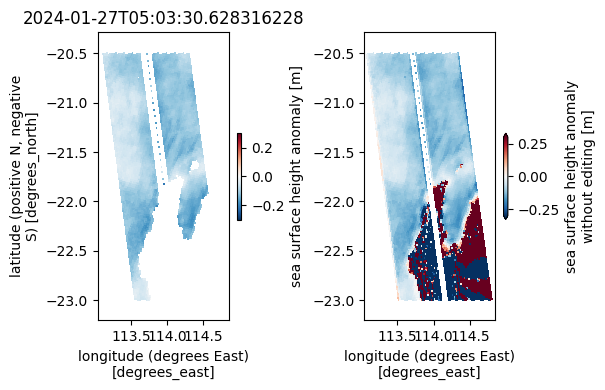

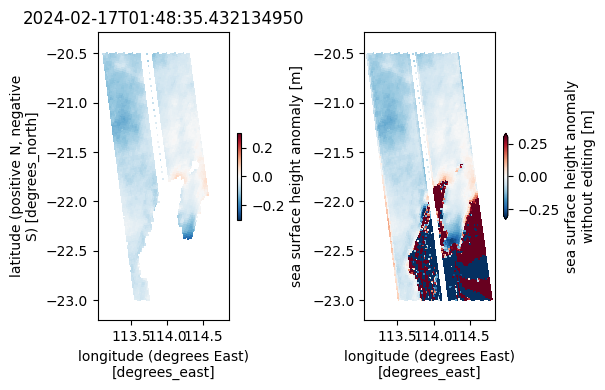

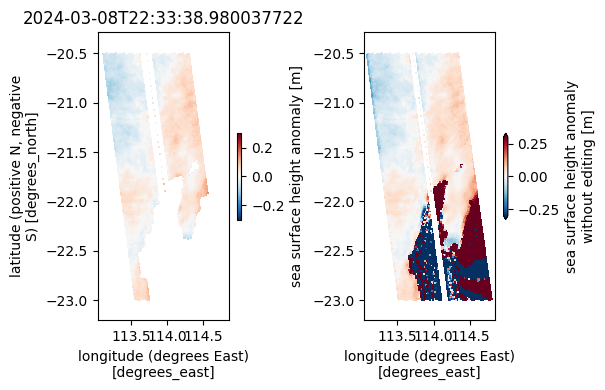

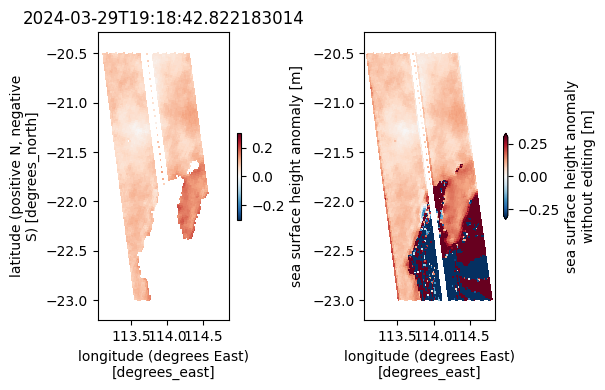

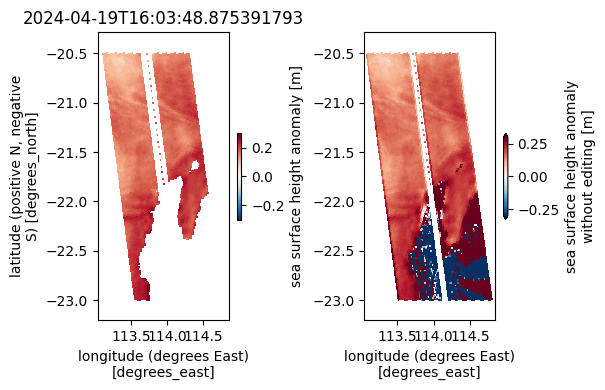

In [55]:
for ii in range(81):
    outfile = '../FIGURES/SWOT/SWOT_Karin_l3_{}_{}.png'.\
        format(region, ds_area.satpass.values[ii].astype(str)[0:10])
    fig,_,_ =plot_karin(ds_area,ii, var1='ssha',var2='ssha_unedited', outfile=outfile)
    
    print(outfile)
    del fig